<a href="https://colab.research.google.com/github/Farha-Dahman/AI_project/blob/main/AI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Prepared by: Farha Dahman, Raghad Khatatba, Nama’ Salameh, Ibtihaj Adham, Abrar hannoon



In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# Reading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def readCSV(mydataframes1, name,size):
  for i in range(size):
    if(i<10):
      path="/content/drive/MyDrive/AIproject/data/0"+str(i)+name
    else :
      path="/content/drive/MyDrive/AIproject/data/"+str(i)+name
    data= pd.read_csv(path)
    mydataframes1 = pd.concat([mydataframes1,data])
  return mydataframes1

In [ ]:
mydataframes1=pd.DataFrame()
name = "_tracks.csv"
mydataframes1 = readCSV(mydataframes1,name,33)

In [ ]:
mydataframes=mydataframes1
X=mydataframes[((mydataframes.width == 0) & (mydataframes.length == 0))].index
mydataframes.drop(X, axis=0, inplace=True)
X

Int64Index([ 55547,  55548,  55549,  55550,  55551,  55552,  55553,  55554,
             55555,  55556,
            ...
            326384, 326385, 326386, 326387, 326388, 326389, 326390, 326391,
            326392, 326393],
           dtype='int64', length=3447064)

In [ ]:
newdataframes = mydataframes.groupby(['recordingId', 'trackId']).size().reset_index(name='count')
newdataframes

,recordingId,trackId,count
0,0,4,15759
1,0,5,24027
2,0,6,454
3,0,7,529
4,0,8,236
...,...,...,...
805,32,415,298
806,32,416,234
807,32,417,205
808,32,460,14


# Standard Deviation (Speed, Acceleration)
### DV1





In [ ]:
res = mydataframes.groupby(['recordingId', 'trackId']).apply(lambda df : df['xVelocity'].std()).reset_index(name='res')

In [ ]:
newdataframes['DV1'] = res['res']

In [ ]:
newdataframes

,recordingId,trackId,count,DV1
0,0,4,15759,0.000000
1,0,5,24027,0.000000
2,0,6,454,4.578684
3,0,7,529,4.019897
4,0,8,236,0.489958
...,...,...,...,...
805,32,415,298,1.322319
806,32,416,234,1.409839
807,32,417,205,1.934766
808,32,460,14,0.021572


###DV2

In [ ]:
def calculateDV2(df):
  newdf = df[df['lonAcceleration'] > 0]
  dv2 = newdf['lonAcceleration'].std()
  return dv2

In [ ]:
res = mydataframes.groupby(['recordingId', 'trackId']).apply(calculateDV2).reset_index(name='res')
newdataframes['DV2'] = res['res']

In [ ]:
newdataframes

,recordingId,trackId,count,DV1,DV2
0,0,4,15759,0.000000,NaN
1,0,5,24027,0.000000,NaN
2,0,6,454,4.578684,0.500238
3,0,7,529,4.019897,0.579526
4,0,8,236,0.489958,0.556321
...,...,...,...,...,...
805,32,415,298,1.322319,0.231796
806,32,416,234,1.409839,0.313184
807,32,417,205,1.934766,0.846259
808,32,460,14,0.021572,NaN


# Coefficient of Variation (Speed, Acceleration)
### DV3



In [ ]:
def calculateDV3(mydataframes):
  cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 if np.mean(x)!=0 else np.NAN
  dv3 = cv(mydataframes['xVelocity'])
  return dv3

In [ ]:
res = mydataframes.groupby(['recordingId', 'trackId']).apply(calculateDV3).reset_index(name='res')
newdataframes['DV3'] = res['res']

In [ ]:
newdataframes

,recordingId,trackId,count,DV1,DV2,DV3
0,0,4,15759,0.000000,NaN,NaN
1,0,5,24027,0.000000,NaN,NaN
2,0,6,454,4.578684,0.500238,98.392845
3,0,7,529,4.019897,0.579526,-113.752082
4,0,8,236,0.489958,0.556321,-3.906662
...,...,...,...,...,...,...
805,32,415,298,1.322319,0.231796,25.209081
806,32,416,234,1.409839,0.313184,27.382712
807,32,417,205,1.934766,0.846259,82.212770
808,32,460,14,0.021572,NaN,-0.190546


###DV4

In [ ]:
def calculateDV4(mydataframes):
  newdf = mydataframes[mydataframes['lonAcceleration'] > 0]
  cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 if np.mean(x)!=0 else x
  dv4 = cv(newdf['lonAcceleration'])
  return dv4

In [ ]:
res = mydataframes.groupby(['recordingId', 'trackId']).apply(calculateDV4).reset_index(name='res')
newdataframes['DV4'] = res['res']

In [ ]:
newdataframes

,recordingId,trackId,count,DV1,DV2,DV3,DV4
0,0,4,15759,0.000000,NaN,NaN,NaN
1,0,5,24027,0.000000,NaN,NaN,NaN
2,0,6,454,4.578684,0.500238,98.392845,44.210166
3,0,7,529,4.019897,0.579526,-113.752082,49.221343
4,0,8,236,0.489958,0.556321,-3.906662,111.101144
...,...,...,...,...,...,...,...
805,32,415,298,1.322319,0.231796,25.209081,33.009131
806,32,416,234,1.409839,0.313184,27.382712,32.738902
807,32,417,205,1.934766,0.846259,82.212770,76.125394
808,32,460,14,0.021572,NaN,-0.190546,NaN


DV5

In [ ]:
def calculateDV5(mydataframes):
  newdf = mydataframes[mydataframes['lonAcceleration'] < 0]
  cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 if np.mean(x)!=0 else x
  dv5 = cv(newdf['lonAcceleration'])
  return dv5

In [ ]:
res = mydataframes.groupby(['recordingId', 'trackId']).apply(calculateDV5).reset_index(name='res')
newdataframes['DV5'] = res['res']

In [ ]:
newdataframes

,recordingId,trackId,count,DV1,DV2,DV3,DV4,DV5
0,0,4,15759,0.000000,NaN,NaN,NaN,NaN
1,0,5,24027,0.000000,NaN,NaN,NaN,NaN
2,0,6,454,4.578684,0.500238,98.392845,44.210166,-68.265175
3,0,7,529,4.019897,0.579526,-113.752082,49.221343,-89.423523
4,0,8,236,0.489958,0.556321,-3.906662,111.101144,-67.878034
...,...,...,...,...,...,...,...,...
805,32,415,298,1.322319,0.231796,25.209081,33.009131,-36.068641
806,32,416,234,1.409839,0.313184,27.382712,32.738902,-48.921139
807,32,417,205,1.934766,0.846259,82.212770,76.125394,-67.969935
808,32,460,14,0.021572,NaN,-0.190546,NaN,-13.921457


# Mean absolute deviation of speed
### DV6

In [ ]:
DV6 = mydataframes.groupby(['recordingId', 'trackId']).apply(lambda df : df['xVelocity'].mad()).reset_index(name='DV6')

In [ ]:
newdataframes['DV6'] = DV6['DV6']

In [ ]:
newdataframes

,recordingId,trackId,count,DV1,DV2,DV3,DV4,DV5,DV6
0,0,4,15759,0.000000,NaN,NaN,NaN,NaN,0.000000
1,0,5,24027,0.000000,NaN,NaN,NaN,NaN,0.000000
2,0,6,454,4.578684,0.500238,98.392845,44.210166,-68.265175,3.921379
3,0,7,529,4.019897,0.579526,-113.752082,49.221343,-89.423523,3.569966
4,0,8,236,0.489958,0.556321,-3.906662,111.101144,-67.878034,0.435597
...,...,...,...,...,...,...,...,...,...
805,32,415,298,1.322319,0.231796,25.209081,33.009131,-36.068641,1.147796
806,32,416,234,1.409839,0.313184,27.382712,32.738902,-48.921139,1.218926
807,32,417,205,1.934766,0.846259,82.212770,76.125394,-67.969935,1.764728
808,32,460,14,0.021572,NaN,-0.190546,NaN,-13.921457,0.017864


# Mean absolute deviation of longitudinal acceleration
### DV7

In [ ]:
def calculateDV7(mydataframes):
  A_df=mydataframes[mydataframes['lonAcceleration']>0]
  dv7 = A_df['lonAcceleration'].mad()
  return dv7
DV7 = mydataframes.groupby(['recordingId', 'trackId']).apply(calculateDV7).reset_index(name='DV7')

In [ ]:
newdataframes['DV7'] = DV7['DV7']
newdataframes

,recordingId,trackId,count,DV1,DV2,DV3,DV4,DV5,DV6,DV7
0,0,4,15759,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN
1,0,5,24027,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN
2,0,6,454,4.578684,0.500238,98.392845,44.210166,-68.265175,3.921379,0.430188
3,0,7,529,4.019897,0.579526,-113.752082,49.221343,-89.423523,3.569966,0.459956
4,0,8,236,0.489958,0.556321,-3.906662,111.101144,-67.878034,0.435597,0.451851
...,...,...,...,...,...,...,...,...,...,...
805,32,415,298,1.322319,0.231796,25.209081,33.009131,-36.068641,1.147796,0.170020
806,32,416,234,1.409839,0.313184,27.382712,32.738902,-48.921139,1.218926,0.250066
807,32,417,205,1.934766,0.846259,82.212770,76.125394,-67.969935,1.764728,0.747187
808,32,460,14,0.021572,NaN,-0.190546,NaN,-13.921457,0.017864,NaN


# Quantile coefficient of variation of normalised speed
### DV8

In [ ]:
def quantileVelocity(mydataframes):
  q1=mydataframes['xVelocity'].quantile(0.25)
  q3=mydataframes['xVelocity'].quantile(0.75)
  dv8 = 100 * ((q3-q1)/(q1+q3))
  return dv8

In [ ]:
res = mydataframes.groupby(['recordingId', 'trackId']).apply(quantileVelocity).reset_index(name='res')
newdataframes['DV8'] = res['res']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [ ]:
newdataframes

,recordingId,trackId,count,DV1,DV2,DV3,DV4,DV5,DV6,DV7,DV8
0,0,4,15759,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
1,0,5,24027,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
2,0,6,454,4.578684,0.500238,98.392845,44.210166,-68.265175,3.921379,0.430188,67.234831
3,0,7,529,4.019897,0.579526,-113.752082,49.221343,-89.423523,3.569966,0.459956,-92.220296
4,0,8,236,0.489958,0.556321,-3.906662,111.101144,-67.878034,0.435597,0.451851,-3.707128
...,...,...,...,...,...,...,...,...,...,...,...
805,32,415,298,1.322319,0.231796,25.209081,33.009131,-36.068641,1.147796,0.170020,22.284311
806,32,416,234,1.409839,0.313184,27.382712,32.738902,-48.921139,1.218926,0.250066,23.133930
807,32,417,205,1.934766,0.846259,82.212770,76.125394,-67.969935,1.764728,0.747187,77.528179
808,32,460,14,0.021572,NaN,-0.190546,NaN,-13.921457,0.017864,NaN,-0.144228


# Quantile coefficient of variation of longitudinal acceleration
### DV9

In [ ]:
def quantileAcceleration(mydataframes):
  q1=mydataframes.loc[mydataframes['lonAcceleration'] > 0]['lonAcceleration'].quantile(0.25)
  q3=mydataframes.loc[mydataframes['lonAcceleration'] > 0]['lonAcceleration'].quantile(0.75)
  dv9 = 100 * ((q3-q1)/(q1+q3))
  return dv9

In [ ]:
res = mydataframes.groupby(['recordingId', 'trackId']).apply(quantileAcceleration).reset_index(name='res')
newdataframes['DV9'] = res['res']

In [ ]:
newdataframes

,recordingId,trackId,count,DV1,DV2,DV3,DV4,DV5,DV6,DV7,DV8,DV9
0,0,4,15759,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
1,0,5,24027,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
2,0,6,454,4.578684,0.500238,98.392845,44.210166,-68.265175,3.921379,0.430188,67.234831,36.931378
3,0,7,529,4.019897,0.579526,-113.752082,49.221343,-89.423523,3.569966,0.459956,-92.220296,34.886245
4,0,8,236,0.489958,0.556321,-3.906662,111.101144,-67.878034,0.435597,0.451851,-3.707128,88.181663
...,...,...,...,...,...,...,...,...,...,...,...,...
805,32,415,298,1.322319,0.231796,25.209081,33.009131,-36.068641,1.147796,0.170020,22.284311,15.545030
806,32,416,234,1.409839,0.313184,27.382712,32.738902,-48.921139,1.218926,0.250066,23.133930,18.451275
807,32,417,205,1.934766,0.846259,82.212770,76.125394,-67.969935,1.764728,0.747187,77.528179,69.051451
808,32,460,14,0.021572,NaN,-0.190546,NaN,-13.921457,0.017864,NaN,-0.144228,NaN


# Quantile coefficient of variation of longitudinal deceleration
### DV10

In [ ]:
def quantileDeceleration(mydataframes):
  q1=mydataframes.loc[mydataframes['lonAcceleration'] < 0]['lonAcceleration'].quantile(0.25)
  q3=mydataframes.loc[mydataframes['lonAcceleration'] < 0]['lonAcceleration'].quantile(0.75)
  dv10 = 100 * ((q3-q1)/(q1+q3))
  return dv10

In [ ]:
res = mydataframes.groupby(['recordingId', 'trackId']).apply(quantileDeceleration).reset_index(name='res')
newdataframes['DV10'] = res['res']

In [ ]:
newdataframes

,recordingId,trackId,count,DV1,DV2,DV3,DV4,DV5,DV6,DV7,DV8,DV9,DV10
0,0,4,15759,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
1,0,5,24027,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
2,0,6,454,4.578684,0.500238,98.392845,44.210166,-68.265175,3.921379,0.430188,67.234831,36.931378,-58.087877
3,0,7,529,4.019897,0.579526,-113.752082,49.221343,-89.423523,3.569966,0.459956,-92.220296,34.886245,-78.842383
4,0,8,236,0.489958,0.556321,-3.906662,111.101144,-67.878034,0.435597,0.451851,-3.707128,88.181663,-45.328879
...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,32,415,298,1.322319,0.231796,25.209081,33.009131,-36.068641,1.147796,0.170020,22.284311,15.545030,-23.894687
806,32,416,234,1.409839,0.313184,27.382712,32.738902,-48.921139,1.218926,0.250066,23.133930,18.451275,-40.055836
807,32,417,205,1.934766,0.846259,82.212770,76.125394,-67.969935,1.764728,0.747187,77.528179,69.051451,-51.395142
808,32,460,14,0.021572,NaN,-0.190546,NaN,-13.921457,0.017864,NaN,-0.144228,NaN,-14.074599


# Percentage of time the mean normalised speed exceeds the mean plus two standard deviations
### DV11

In [ ]:
def calculateDV11(mydataframes):
    Along_mean = mydataframes['xVelocity'].mean()
    df = mydataframes[mydataframes['xVelocity'] >= Along_mean]
    sum = 0
    valocity_series = pd.Series()
    valocity_series = df['xVelocity']

    dv1_series = pd.Series()
    dv1_series = newdataframes['DV1']

    for (valocity, dv1) in zip(valocity_series , dv1_series) :
        sum += valocity+ 2 * dv1
    dv11 = sum / len(mydataframes)
    return 100 * dv11

In [ ]:
res = mydataframes.groupby(['recordingId', 'trackId']).apply(calculateDV11).reset_index(name='res')
newdataframes['DV11'] = res['res']
newdataframes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,recordingId,trackId,count,DV1,DV2,DV3,DV4,DV5,DV6,DV7,DV8,DV9,DV10,DV11
0,0,4,15759,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
1,0,5,24027,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2,0,6,454,4.578684,0.500238,98.392845,44.210166,-68.265175,3.921379,0.430188,67.234831,36.931378,-58.087877,NaN
3,0,7,529,4.019897,0.579526,-113.752082,49.221343,-89.423523,3.569966,0.459956,-92.220296,34.886245,-78.842383,NaN
4,0,8,236,0.489958,0.556321,-3.906662,111.101144,-67.878034,0.435597,0.451851,-3.707128,88.181663,-45.328879,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,32,415,298,1.322319,0.231796,25.209081,33.009131,-36.068641,1.147796,0.170020,22.284311,15.545030,-23.894687,NaN
806,32,416,234,1.409839,0.313184,27.382712,32.738902,-48.921139,1.218926,0.250066,23.133930,18.451275,-40.055836,NaN
807,32,417,205,1.934766,0.846259,82.212770,76.125394,-67.969935,1.764728,0.747187,77.528179,69.051451,-51.395142,344.266947
808,32,460,14,0.021572,NaN,-0.190546,NaN,-13.921457,0.017864,NaN,-0.144228,NaN,-14.074599,-418.455892


# Percentage of time the mean of longitudinal acceleration exceeds the mean plus two standard deviations
### DV12

In [ ]:
def calculateDV12(mydataframes):
    A_df =mydataframes[mydataframes['lonAcceleration'] > 0]
    Along_mean = A_df['lonAcceleration'].mean()
    df = A_df[A_df['lonAcceleration'] >= Along_mean]

    lonAcceleration_series = pd.Series()
    lonAcceleration_series = df['lonAcceleration']

    dv2_series = pd.Series()
    dv2_series = newdataframes['DV2']

    sum = 0
    for (lonAcceleration, dv2) in zip(lonAcceleration_series , dv2_series) :
        sum += lonAcceleration + (2 * dv2)

    dv12 = sum / len(mydataframes)
    return 100 * dv12
res = mydataframes.groupby(['recordingId', 'trackId']).apply(calculateDV12).reset_index(name='res')
newdataframes['DV12'] = res['res']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':


In [ ]:
newdataframes

,recordingId,trackId,count,DV1,DV2,DV3,DV4,DV5,DV6,DV7,DV8,DV9,DV10,DV11,DV12
0,0,4,15759,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0
1,0,5,24027,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0
2,0,6,454,4.578684,0.500238,98.392845,44.210166,-68.265175,3.921379,0.430188,67.234831,36.931378,-58.087877,NaN,NaN
3,0,7,529,4.019897,0.579526,-113.752082,49.221343,-89.423523,3.569966,0.459956,-92.220296,34.886245,-78.842383,NaN,NaN
4,0,8,236,0.489958,0.556321,-3.906662,111.101144,-67.878034,0.435597,0.451851,-3.707128,88.181663,-45.328879,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,32,415,298,1.322319,0.231796,25.209081,33.009131,-36.068641,1.147796,0.170020,22.284311,15.545030,-23.894687,NaN,NaN
806,32,416,234,1.409839,0.313184,27.382712,32.738902,-48.921139,1.218926,0.250066,23.133930,18.451275,-40.055836,NaN,NaN
807,32,417,205,1.934766,0.846259,82.212770,76.125394,-67.969935,1.764728,0.747187,77.528179,69.051451,-51.395142,344.266947,NaN
808,32,460,14,0.021572,NaN,-0.190546,NaN,-13.921457,0.017864,NaN,-0.144228,NaN,-14.074599,-418.455892,0.0


# Percentage of time the mean longitudinal deceleration exceeds the mean plus two standard deviations
### DV13

In [ ]:
def calculateDV13(mydataframes):
    D_df =mydataframes[mydataframes['lonAcceleration'] < 0]
    Dlong_mean = D_df['lonAcceleration'].mean()
    df = D_df[D_df['lonAcceleration'] >= Dlong_mean]

    lonAcceleration_series = pd.Series()
    lonAcceleration_series = df['lonAcceleration']

    dv2_series = pd.Series()
    dv2_series = newdataframes['DV2']

    sum = 0
    for (lonAcceleration, dv2) in zip(lonAcceleration_series , dv2_series) :
        sum += lonAcceleration+ 2 * dv2
    dv13 = sum / len(mydataframes)
    return 100 * dv13

res = mydataframes.groupby(['recordingId', 'trackId']).apply(calculateDV13).reset_index(name='res')
newdataframes['DV13'] = res['res']
newdataframes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':


,recordingId,trackId,count,DV1,DV2,DV3,DV4,DV5,DV6,DV7,DV8,DV9,DV10,DV11,DV12,DV13
0,0,4,15759,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,0,5,24027,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,0,6,454,4.578684,0.500238,98.392845,44.210166,-68.265175,3.921379,0.430188,67.234831,36.931378,-58.087877,NaN,NaN,NaN
3,0,7,529,4.019897,0.579526,-113.752082,49.221343,-89.423523,3.569966,0.459956,-92.220296,34.886245,-78.842383,NaN,NaN,NaN
4,0,8,236,0.489958,0.556321,-3.906662,111.101144,-67.878034,0.435597,0.451851,-3.707128,88.181663,-45.328879,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,32,415,298,1.322319,0.231796,25.209081,33.009131,-36.068641,1.147796,0.170020,22.284311,15.545030,-23.894687,NaN,NaN,NaN
806,32,416,234,1.409839,0.313184,27.382712,32.738902,-48.921139,1.218926,0.250066,23.133930,18.451275,-40.055836,NaN,NaN,NaN
807,32,417,205,1.934766,0.846259,82.212770,76.125394,-67.969935,1.764728,0.747187,77.528179,69.051451,-51.395142,344.266947,NaN,NaN
808,32,460,14,0.021572,NaN,-0.190546,NaN,-13.921457,0.017864,NaN,-0.144228,NaN,-14.074599,-418.455892,0.0,NaN


In [ ]:
newdataframes

,recordingId,trackId,count,DV1,DV2,DV3,DV4,DV5,DV6,DV7,DV8,DV9,DV10,DV11,DV12,DV13
0,0,4,15759,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,0,5,24027,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,0,6,454,4.578684,0.500238,98.392845,44.210166,-68.265175,3.921379,0.430188,67.234831,36.931378,-58.087877,NaN,NaN,NaN
3,0,7,529,4.019897,0.579526,-113.752082,49.221343,-89.423523,3.569966,0.459956,-92.220296,34.886245,-78.842383,NaN,NaN,NaN
4,0,8,236,0.489958,0.556321,-3.906662,111.101144,-67.878034,0.435597,0.451851,-3.707128,88.181663,-45.328879,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,32,415,298,1.322319,0.231796,25.209081,33.009131,-36.068641,1.147796,0.170020,22.284311,15.545030,-23.894687,NaN,NaN,NaN
806,32,416,234,1.409839,0.313184,27.382712,32.738902,-48.921139,1.218926,0.250066,23.133930,18.451275,-40.055836,NaN,NaN,NaN
807,32,417,205,1.934766,0.846259,82.212770,76.125394,-67.969935,1.764728,0.747187,77.528179,69.051451,-51.395142,344.266947,NaN,NaN
808,32,460,14,0.021572,NaN,-0.190546,NaN,-13.921457,0.017864,NaN,-0.144228,NaN,-14.074599,-418.455892,0.0,NaN


In [ ]:
newdataframes = newdataframes.drop(['recordingId','trackId','count'] , axis =1)
newdataframes

,DV1,DV2,DV3,DV4,DV5,DV6,DV7,DV8,DV9,DV10,DV11,DV12,DV13
0,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,4.578684,0.500238,98.392845,44.210166,-68.265175,3.921379,0.430188,67.234831,36.931378,-58.087877,NaN,NaN,NaN
3,4.019897,0.579526,-113.752082,49.221343,-89.423523,3.569966,0.459956,-92.220296,34.886245,-78.842383,NaN,NaN,NaN
4,0.489958,0.556321,-3.906662,111.101144,-67.878034,0.435597,0.451851,-3.707128,88.181663,-45.328879,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,1.322319,0.231796,25.209081,33.009131,-36.068641,1.147796,0.170020,22.284311,15.545030,-23.894687,NaN,NaN,NaN
806,1.409839,0.313184,27.382712,32.738902,-48.921139,1.218926,0.250066,23.133930,18.451275,-40.055836,NaN,NaN,NaN
807,1.934766,0.846259,82.212770,76.125394,-67.969935,1.764728,0.747187,77.528179,69.051451,-51.395142,344.266947,NaN,NaN
808,0.021572,NaN,-0.190546,NaN,-13.921457,0.017864,NaN,-0.144228,NaN,-14.074599,-418.455892,0.0,NaN


In [ ]:
newdataframes = newdataframes.fillna(0)

## Clustring data

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def KMeans_cluster(data, k):
    my_kmeans = KMeans(n_clusters= k)
    my_kmeans.fit(data)
    clusters = my_kmeans.predict(data)
    centroids = my_kmeans.cluster_centers_
    return clusters,  pd.DataFrame(centroids)

In [ ]:
newdataframes

,DV1,DV2,DV3,DV4,DV5,DV6,DV7,DV8,DV9,DV10,DV11,DV12,DV13
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,4.578684,0.500238,98.392845,44.210166,-68.265175,3.921379,0.430188,67.234831,36.931378,-58.087877,0.000000,0.0,0.0
3,4.019897,0.579526,-113.752082,49.221343,-89.423523,3.569966,0.459956,-92.220296,34.886245,-78.842383,0.000000,0.0,0.0
4,0.489958,0.556321,-3.906662,111.101144,-67.878034,0.435597,0.451851,-3.707128,88.181663,-45.328879,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,1.322319,0.231796,25.209081,33.009131,-36.068641,1.147796,0.170020,22.284311,15.545030,-23.894687,0.000000,0.0,0.0
806,1.409839,0.313184,27.382712,32.738902,-48.921139,1.218926,0.250066,23.133930,18.451275,-40.055836,0.000000,0.0,0.0
807,1.934766,0.846259,82.212770,76.125394,-67.969935,1.764728,0.747187,77.528179,69.051451,-51.395142,344.266947,0.0,0.0
808,0.021572,0.000000,-0.190546,0.000000,-13.921457,0.017864,0.000000,-0.144228,0.000000,-14.074599,-418.455892,0.0,0.0


In [ ]:
newdataframes = newdataframes.fillna(0)

In [ ]:
cluster1, centroids1 = KMeans_cluster(newdataframes, 3)

In [ ]:
count = np.count_nonzero(cluster1 == 0)
count

649

In [ ]:
count = np.count_nonzero(cluster1 == 1)
count

159

In [ ]:
count = np.count_nonzero(cluster1 == 2)
count

2

In [ ]:
centroids1 = centroids1.rename(columns = {0 : 'DV1' , 1 : 'DV2' , 2 : 'DV3',3 : 'DV4' , 4 : 'DV5' , 5 : 'DV6' , 6 : 'DV7' , 7 : 'DV8' , 8 : 'DV9',9 : 'DV10', 10 : 'DV11', 11:'DV12', 12:'DV13' })
centroids1 = centroids1.rename(index={0: "Normal", 1: "Conservative", 2: "Aggresive"})
centroids1

,DV1,DV2,DV3,DV4,DV5,DV6,DV7,DV8,DV9,DV10,DV11,DV12,DV13
Normal,0.882336,0.268037,1.692206,49.633089,-34.614129,0.759904,0.215726,-4.592957,31.023159,-26.497794,-69.860473,0.0,0.0
Conservative,0.600839,0.333110,24.782540,62.088378,-39.380111,0.514501,0.275616,20.527350,41.827745,-29.714680,695.410713,0.0,0.0
Aggresive,5.635823,0.673662,-5646.023958,89.638092,-89.903999,4.808256,0.552305,1736.568138,69.782633,-74.741284,0.000000,0.0,0.0


In [ ]:
cluster2, centroids2 = KMeans_cluster(newdataframes, 2)

In [ ]:
count = np.count_nonzero(cluster2 == 0)
count

651

In [ ]:
count = np.count_nonzero(cluster2 == 1)
count

159

In [ ]:
centroids2 = centroids2.rename(columns = {0 : 'DV1' , 1 : 'DV2' , 2 : 'DV3',3 : 'DV4' , 4 : 'DV5' , 5 : 'DV6' , 6 : 'DV7' , 7 : 'DV8' , 8 : 'DV9',9 : 'DV10', 10 : 'DV11', 11:'DV12', 12:'DV13' })
centroids2 = centroids2.rename(index={0: "Normal", 1: "Conservative"})
centroids2

,DV1,DV2,DV3,DV4,DV5,DV6,DV7,DV8,DV9,DV10,DV11,DV12,DV13
Normal,0.896939,0.269283,-15.658689,49.755992,-34.783990,0.772342,0.216760,0.756233,31.142236,-26.646007,-69.645848,0.0,0.0
Conservative,0.600839,0.333110,24.782540,62.088378,-39.380111,0.514501,0.275616,20.527350,41.827745,-29.714680,695.410713,0.0,0.0


In [ ]:
data = newdataframes.values

In [ ]:
data

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.57868402e+00,  5.00238317e-01,  9.83928451e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.93476558e+00,  8.46259331e-01,  8.22127705e+01, ...,
         3.44266947e+02,  0.00000000e+00,  0.00000000e+00],
       [ 2.15715071e-02,  0.00000000e+00, -1.90546276e-01, ...,
        -4.18455892e+02,  0.00000000e+00,  0.00000000e+00],
       [ 2.44224077e-01,  6.46413317e-01,  2.16934201e+00, ...,
         9.13592442e+02,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

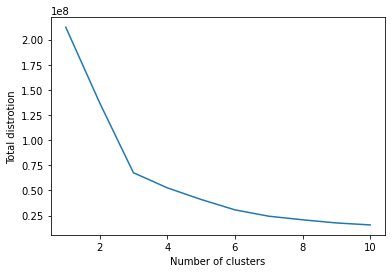

In [ ]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Total distrotion')
plt.show()

In [ ]:
dataframeAD= newdataframes.drop(['DV3','DV8','DV12','DV13'] , axis =1)
dataframeAD

,DV1,DV2,DV4,DV5,DV6,DV7,DV9,DV10,DV11
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,4.578684,0.500238,44.210166,-68.265175,3.921379,0.430188,36.931378,-58.087877,0.000000
3,4.019897,0.579526,49.221343,-89.423523,3.569966,0.459956,34.886245,-78.842383,0.000000
4,0.489958,0.556321,111.101144,-67.878034,0.435597,0.451851,88.181663,-45.328879,0.000000
...,...,...,...,...,...,...,...,...,...
805,1.322319,0.231796,33.009131,-36.068641,1.147796,0.170020,15.545030,-23.894687,0.000000
806,1.409839,0.313184,32.738902,-48.921139,1.218926,0.250066,18.451275,-40.055836,0.000000
807,1.934766,0.846259,76.125394,-67.969935,1.764728,0.747187,69.051451,-51.395142,344.266947
808,0.021572,0.000000,0.000000,-13.921457,0.017864,0.000000,0.000000,-14.074599,-418.455892


In [ ]:
cluster3, centroids3 = KMeans_cluster(dataframeAD, 3)

In [ ]:
cluster3

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0,
       2, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0,
       2, 1, 0, 2, 1, 1, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 0,
       1, 2, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1,
       0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 0, 0,

In [ ]:
centroids3

,0,1,2,3,4,5,6,7,8
0,1.024766,0.244646,43.741187,-35.342340,0.884993,0.200304,28.779183,-27.419442,5.150814
1,0.554693,0.335160,61.828678,-38.542708,0.472954,0.276962,41.597640,-29.289785,707.336937
2,0.372866,0.379359,77.469254,-33.556195,0.311739,0.290990,42.437736,-23.864477,-387.165571


In [ ]:
count = np.count_nonzero(cluster3 == 0)
count

536

In [ ]:
count = np.count_nonzero(cluster3 == 1)
count

154

In [ ]:
count = np.count_nonzero(cluster3 == 2)
count

120

In [ ]:
len(cluster3)

810

In [ ]:
centroids3 = centroids3.rename(columns = {0 : 'DV1' , 1 : 'DV2' , 2 : 'DV4',3 : 'DV5' , 4 : 'DV6' , 5 : 'DV7' , 6 : 'DV9' , 7 : 'DV10' , 8 : 'DV11' })
centroids3 = centroids3.rename(index={0: 'Normal', 1: 'Conservative', 2: 'Aggressive'})
centroids3

,DV1,DV2,DV4,DV5,DV6,DV7,DV9,DV10,DV11
Normal,1.024766,0.244646,43.741187,-35.342340,0.884993,0.200304,28.779183,-27.419442,5.150814
Conservative,0.554693,0.335160,61.828678,-38.542708,0.472954,0.276962,41.597640,-29.289785,707.336937
Aggressive,0.372866,0.379359,77.469254,-33.556195,0.311739,0.290990,42.437736,-23.864477,-387.165571


In [ ]:
dataframeAD['cluster3'] = cluster3

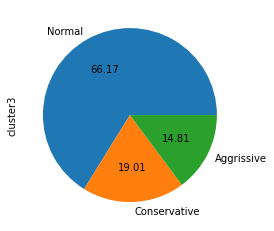

In [ ]:
dataframeAD['cluster3'].value_counts(normalize=True).plot.pie(labels=["Normal", "Conservative", "Aggrissive"],autopct="%.2f")
plt.show()

In [ ]:
dataframeAD.keys()

Index(['DV1', 'DV2', 'DV4', 'DV5', 'DV6', 'DV7', 'DV9', 'DV10', 'DV11',
       'cluster3'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataframeAD)

StandardScaler()

In [ ]:
scaled_data = scaler.transform(dataframeAD)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [ ]:
x_pca = pca.transform(scaled_data)

In [ ]:
scaled_data.shape

(810, 10)

In [ ]:
x_pca.shape

(810, 2)

In [ ]:
kmeans_model = KMeans(n_clusters=3).fit(dataframeAD)
print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)

[[ 1.02476556e+00  2.44645530e-01  4.37411871e+01 -3.53423405e+01
   8.84993346e-01  2.00304085e-01  2.87791827e+01 -2.74194420e+01
   5.15081430e+00 -4.99600361e-16]
 [ 5.54692501e-01  3.35159895e-01  6.18286785e+01 -3.85427083e+01
   4.72954359e-01  2.76961623e-01  4.15976400e+01 -2.92897849e+01
   7.07336937e+02  1.00000000e+00]
 [ 3.72866303e-01  3.79358511e-01  7.74692538e+01 -3.35561955e+01
   3.11738936e-01  2.90990062e-01  4.24377359e+01 -2.38644766e+01
  -3.87165571e+02  2.00000000e+00]]


Text(0, 0.5, 'Second Principal Component')

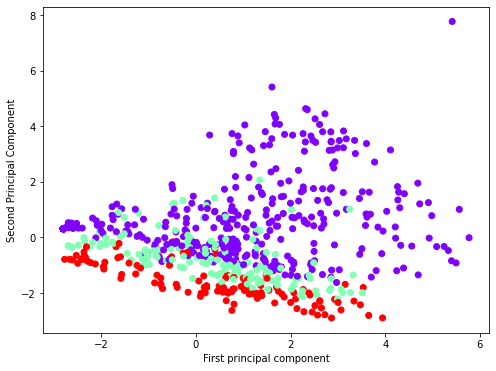

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=dataframeAD['cluster3'],cmap='rainbow')
#plt.scatter(centers[:,0], centers[:,1], marker="s", color='y')
#plt.legend(["nor" , "con","agg"])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [ ]:
dataframeAD=dataframeAD.drop('cluster3',axis=1)
dataframeAD

,DV1,DV2,DV4,DV5,DV6,DV7,DV9,DV10,DV11
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,4.578684,0.500238,44.210166,-68.265175,3.921379,0.430188,36.931378,-58.087877,0.000000
3,4.019897,0.579526,49.221343,-89.423523,3.569966,0.459956,34.886245,-78.842383,0.000000
4,0.489958,0.556321,111.101144,-67.878034,0.435597,0.451851,88.181663,-45.328879,0.000000
...,...,...,...,...,...,...,...,...,...
805,1.322319,0.231796,33.009131,-36.068641,1.147796,0.170020,15.545030,-23.894687,0.000000
806,1.409839,0.313184,32.738902,-48.921139,1.218926,0.250066,18.451275,-40.055836,0.000000
807,1.934766,0.846259,76.125394,-67.969935,1.764728,0.747187,69.051451,-51.395142,344.266947
808,0.021572,0.000000,0.000000,-13.921457,0.017864,0.000000,0.000000,-14.074599,-418.455892


In [ ]:
cluster4, centroids4 = KMeans_cluster(dataframeAD, 2)

In [ ]:
centroids4

,0,1,2,3,4,5,6,7,8
0,0.900407,0.269002,49.935383,-34.866377,0.775457,0.216544,31.237622,-26.671517,-68.500276
1,0.582643,0.335093,61.499352,-39.095992,0.498260,0.277266,41.567131,-29.647672,700.391951


In [ ]:
count = np.count_nonzero(cluster4 == 0)
count

653

In [ ]:
count = np.count_nonzero(cluster4 == 1)
count

157

In [ ]:
centroids4 = centroids4.rename(columns = {0 : 'DV1' , 1 : 'DV2' , 2 : 'DV4',3 : 'DV5' , 4 : 'DV6' , 5 : 'DV7' , 6 : 'DV9' , 7 : 'DV10' , 8 : 'DV11' })
centroids4 = centroids4.rename(index={0: "Conservative", 1: "Normal"})
centroids4

,DV1,DV2,DV4,DV5,DV6,DV7,DV9,DV10,DV11
Conservative,0.900407,0.269002,49.935383,-34.866377,0.775457,0.216544,31.237622,-26.671517,-68.500276
Normal,0.582643,0.335093,61.499352,-39.095992,0.498260,0.277266,41.567131,-29.647672,700.391951


In [ ]:
dataframeAD['cluster4'] = cluster4

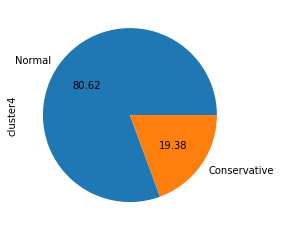

In [ ]:
dataframeAD['cluster4'].value_counts(normalize=True).plot.pie(labels=["Normal", "Conservative"],autopct="%.2f")
plt.show()

In [ ]:
dataframeAD.keys()

Index(['DV1', 'DV2', 'DV4', 'DV5', 'DV6', 'DV7', 'DV9', 'DV10', 'DV11',
       'cluster4'],
      dtype='object')

In [ ]:
kmeans_model = KMeans(n_clusters=2).fit(dataframeAD)

print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)

[[ 9.00407398e-01  2.69001663e-01  4.99353828e+01 -3.48663772e+01
   7.75456810e-01  2.16543740e-01  3.12376220e+01 -2.66715169e+01
  -6.85002757e+01  6.93889390e-16]
 [ 5.82642731e-01  3.35092761e-01  6.14993518e+01 -3.90959916e+01
   4.98259748e-01  2.77266400e-01  4.15671313e+01 -2.96476716e+01
   7.00391951e+02  1.00000000e+00]]


Text(0, 0.5, 'Second Principal Component')

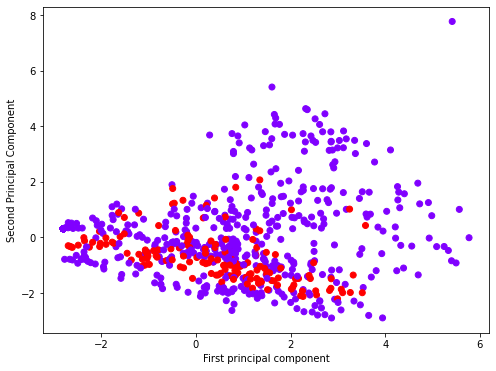

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=dataframeAD['cluster4'],cmap='rainbow')
#plt.scatter(centers[:,0], centers[:,1], marker="s", color='y')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [ ]:
dataframeAD=dataframeAD.drop('cluster4',axis=1)
dataframeAD

,DV1,DV2,DV4,DV5,DV6,DV7,DV9,DV10,DV11
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,4.578684,0.500238,44.210166,-68.265175,3.921379,0.430188,36.931378,-58.087877,0.000000
3,4.019897,0.579526,49.221343,-89.423523,3.569966,0.459956,34.886245,-78.842383,0.000000
4,0.489958,0.556321,111.101144,-67.878034,0.435597,0.451851,88.181663,-45.328879,0.000000
...,...,...,...,...,...,...,...,...,...
805,1.322319,0.231796,33.009131,-36.068641,1.147796,0.170020,15.545030,-23.894687,0.000000
806,1.409839,0.313184,32.738902,-48.921139,1.218926,0.250066,18.451275,-40.055836,0.000000
807,1.934766,0.846259,76.125394,-67.969935,1.764728,0.747187,69.051451,-51.395142,344.266947
808,0.021572,0.000000,0.000000,-13.921457,0.017864,0.000000,0.000000,-14.074599,-418.455892


In [ ]:
data = dataframeAD.values

In [ ]:
data

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.57868402e+00,  5.00238317e-01,  4.42101660e+01, ...,
         3.69313778e+01, -5.80878775e+01,  0.00000000e+00],
       ...,
       [ 1.93476558e+00,  8.46259331e-01,  7.61253943e+01, ...,
         6.90514505e+01, -5.13951417e+01,  3.44266947e+02],
       [ 2.15715071e-02,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.40745986e+01, -4.18455892e+02],
       [ 2.44224077e-01,  6.46413317e-01,  5.35718706e+01, ...,
         4.60971541e+01,  0.00000000e+00,  9.13592442e+02]])

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

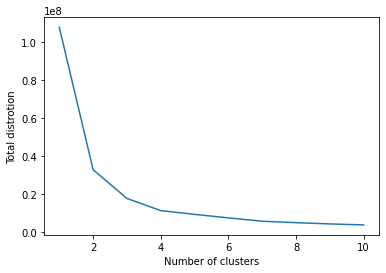

In [ ]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Total distrotion')
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


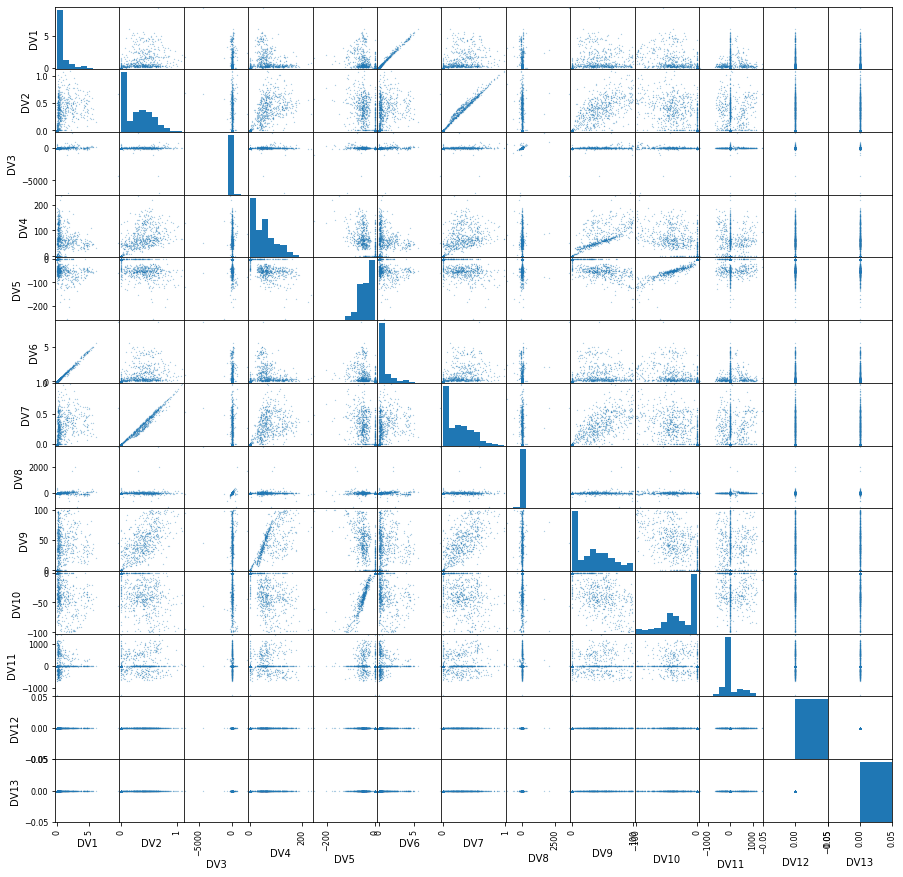

In [ ]:
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix
scatter_matrix(newdataframes,
               figsize  = [15, 15],
               marker   = "1",
               s        = 0.2
)
pyplot.show()